#**Task 3 : Explore Unsupervised Machine Learning**

**Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.cluster import KMeans

**Loading the dataset**

In [ ]:
dataset=datasets.load_iris()
col=dataset.feature_names
data=pd.DataFrame(dataset.data,columns=col)
print(data)
label=dataset.target

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


The iris data set basically contains three different types of iris flower data. But here the name of the flower is not given, instead the features are given

Using this features, we need to group similar types of flowers, or we can say we need to cluster them

In [ ]:
y=[]
for i in label:
  if i==0:
    y.append(dataset.target_names[0])
  elif i==1:
    y.append(dataset.target_names[1])
  else:
    y.append(dataset.target_names[2])
data["species"]=np.array(y)

**Visualize data using pair plots**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


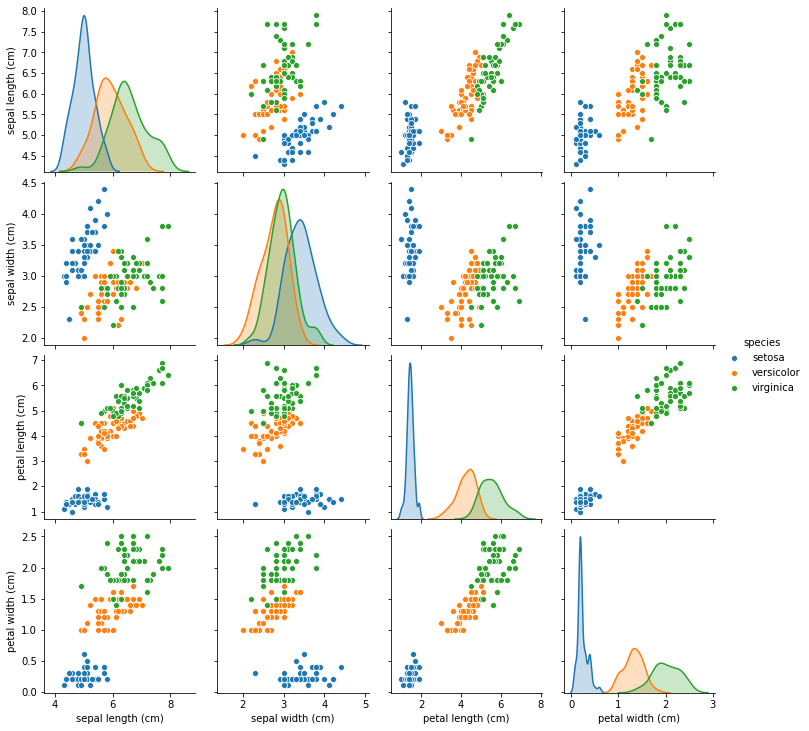

In [ ]:
import seaborn as sns
sns.pairplot(data,hue="species")

From this pairplot we can see that petal length and petal width can easily seperate the species "setosa" from other two. So both these features can be used in clustering the data. The histogram also indicate that, petal length and petal width of "setosa" is easily seperable from the petal length and petal width of other two species

###**Use K means clustering to clutser the data**

**Find the optimum number of clusters. So that the data is well seperated**

In [ ]:
x=data.iloc[:,[0,1,2,3]].values


In [ ]:
k=range(1,12)
score=[]
for c in k:
  model=KMeans(n_clusters=c,init="k-means++",random_state=1)
  model.fit(x,label)
  score.append(model.inertia_)

**Finding the optimum number of clutsers using Elbow method**

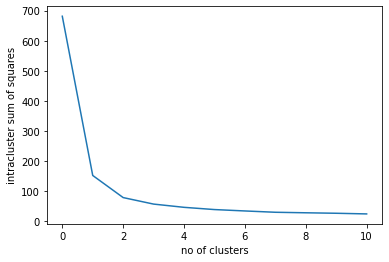

In [ ]:
plt.xlabel("no of clusters")
plt.ylabel("intracluster sum of squares")
plt.plot(score)

We select optimum no of clutsers as k=3

This is because with k=3 , the intracluster distance is less
As k increases, the distance decreases, but this will lead to overfitting of the data and k with least value may result in cluster where each data point is treated as seperate clutser

So here we select k=3

Here in the data also, there is three different species, ie, three different groups


In [ ]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(x,label)
y_kmeans=kmeans.fit_predict(x)

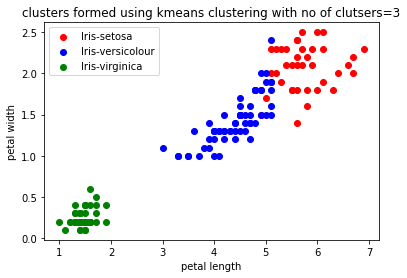

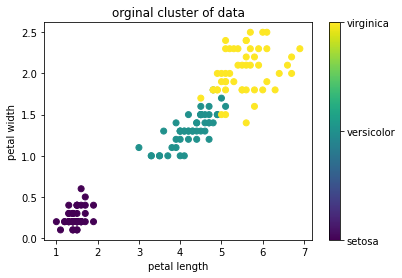

In [ ]:
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], 
             c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], 
             c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3],
             c = 'green', label = 'Iris-virginica')

plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend()
plt.title("clusters formed using kmeans clustering with no of clutsers=3")
plt.show()

formatter = plt.FuncFormatter(lambda i, *args: dataset.target_names[int(i)])
plt.scatter(x[:,2],x[:,3],c=label)
plt.colorbar(ticks=[0, 1,2], format=formatter)
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.title("orginal cluster of data")
plt.show()

##**Visualizing the clusters using tsne**


In [ ]:
pred=[]
for i in y_kmeans:
  if i==0:
    pred.append(dataset.target_names[0])
  elif i==1:
    pred.append(dataset.target_names[1])
  else:
    pred.append(dataset.target_names[2])


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


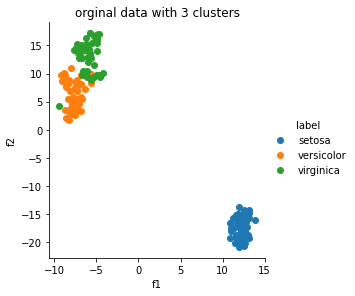

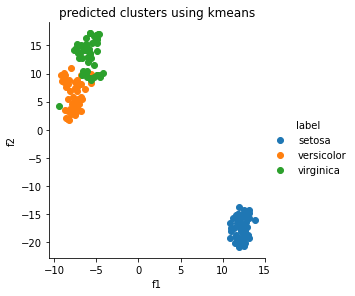

In [ ]:
from sklearn.manifold import TSNE
tsne=TSNE(random_state=1)
x_dash=tsne.fit_transform(x)
df=pd.DataFrame(x_dash,columns=["f1","f2"])
df["label"]=np.array(y)
df["predicted"]=np.array(pred)

sns.FacetGrid(df,hue="label",size=4).map(plt.scatter,"f1","f2").add_legend()
plt.title("orginal data with 3 clusters")
plt.show()

sns.FacetGrid(df,hue="label",size=4).map(plt.scatter,"f1","f2").add_legend()
plt.title("predicted clusters using kmeans")
plt.show()

**Conclusions:** The species setosa can be easily seperated from other two species using simple "if - else" conditions. The other two species can be linearly serated using a plane

Also, the data can be well clustered into 3 clusters